In [ ]:
!pip install transformers datasets evaluate sentence-transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.4/81.4 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125938 sha256=9590b3186147ccc83539348e4d62dffca18d3aafa078e8b964e5430013a88c30
  Stored in directory: /root/.cache/pip/wheels/83/71/2b/40d17d21937fed496fb99145227eca8f20b4891240ff60c86f
Successfully built sentence-transformers


# Challenge I : Sentiment Analysis

In this challenge you will train a sentiment classifier into 2 classes `Negative` and `Positive`.

Directions :
- You are free to choose any technique you want for resolving this problem.
- Use the metrics, F1 score and Acuracy and plot a confusion matrix to evaluate your model
- Give a particular emphazis to the EDA phase.
- We except a well wrtitten, comented and documented code, that respects as closely as possible python's conventions and best coding practisses.

In [ ]:
# imports and configurations
import pandas as pd
import numpy as np

# Data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

## Fetching Data

In [ ]:
!pip install gdown
import gdown

url = "https://drive.google.com/uc?id=1HCXDm5ES-s6vpUx6eZC4K9z5mDIvoslJ"
output = "classification_dataset.csv"
gdown.download(url, output, quiet=False)

Downloading...
From (uriginal): https://drive.google.com/uc?id=1HCXDm5ES-s6vpUx6eZC4K9z5mDIvoslJ
From (redirected): https://drive.google.com/uc?id=1HCXDm5ES-s6vpUx6eZC4K9z5mDIvoslJ&confirm=t&uuid=383349db-20d8-4035-ad5b-75f60d06fdae
To: /home/jupyter/imported/classification_dataset.csv
100%|██████████| 239M/239M [00:03<00:00, 60.5MB/s] 


'classification_dataset.csv'

## Read your data

In [ ]:
# Data manipulation libraries

df = pd.read_csv('classification_dataset.csv', encoding='ISO-8859-1',names=['class', 'col2', 'col3', 'col4','col5', 'text'])
#/kaggle/input/dataset-600milcsv/new_dataset_600mil.csv
#classification_dataset.csv


## EDA

Discover your data, Explore it and Visualize it

In [ ]:
#Understand the data

# check the shape of the data
print(df.shape)
df.head()


(1600000, 6)


,class,col2,col3,col4,col5,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."



Word cloud for the positive class


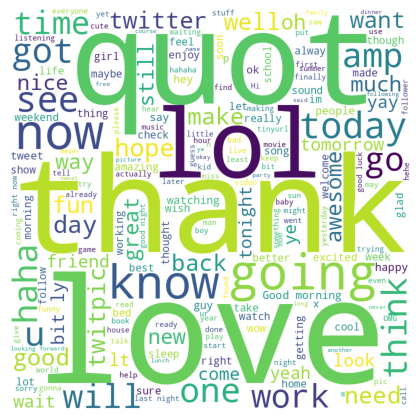


Word cloud for the negative class


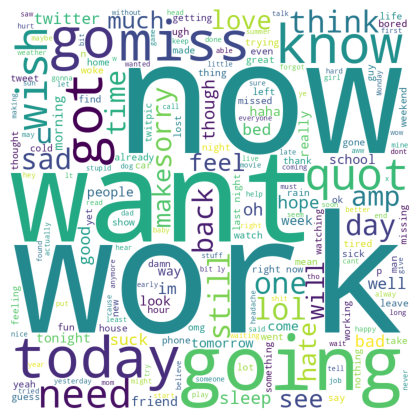


Class Distribution


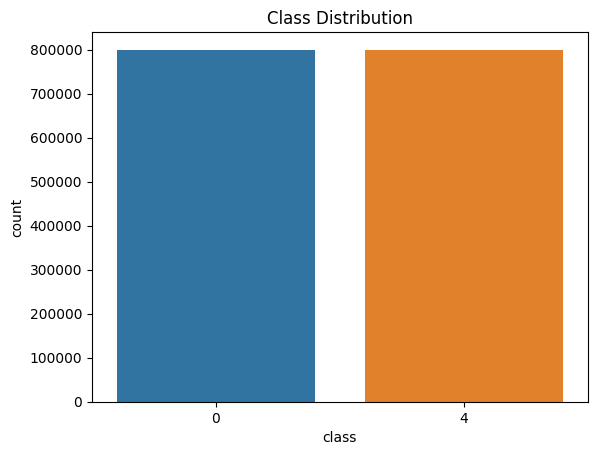


Relationship between the class and the text length


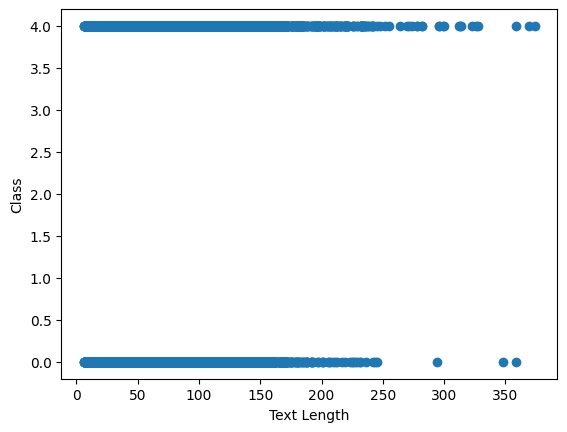


Sentiment polarity for each constitution


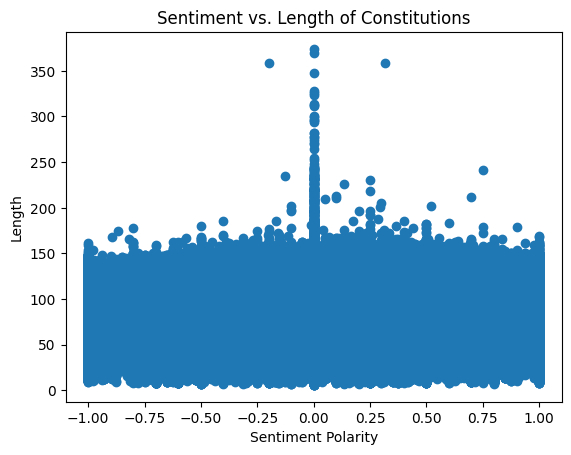

In [ ]:


#---------- Explore and visualize

#visualize commun words of each class
#!pip install wordcloud
#!pip install textblob
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from textblob import TextBlob

# Filter the data by class
positive_data = df[df['class'] == 4]
negative_data = df[df['class'] == 0]



# Create a word cloud for the positive class
positive_words = ' '.join(positive_data['text'])
positive_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white').generate(positive_words)

# Plot the word cloud
print("\nWord cloud for the positive class")
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(positive_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

# Create a word cloud for the negative class
negative_words = ' '.join(negative_data['text'])
negative_wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white').generate(negative_words)

# Plot the word cloud
print("\nWord cloud for the negative class")
plt.figure(figsize = (4, 4), facecolor = None)
plt.imshow(negative_wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()



#class distribution
print("\nClass Distribution")
sns.countplot(x='class', data=df)
plt.title('Class Distribution')
plt.show()



# Get the length of each text in the 'text' column
text_lengths = df['text'].apply(len)

# Create the scatter plot to get an idea about the relationship between the class and the text length
print("\nRelationship between the class and the text length")
plt.scatter(text_lengths, df['class'])
plt.xlabel("Text Length")
plt.ylabel("Class")
plt.show()




# calculate sentiment polarity for each constitution
print("\nSentiment polarity for each constitution")
df['sentiment'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)
plt.scatter(df['sentiment'], df['text'].apply(len))
plt.title('Sentiment vs. Length of Constitutions')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Length')
plt.show()


## Data preprocessing

In [ ]:
# Shuffle the data
df = df.sample(frac=1, random_state=42)

# Take a subset of the first class
class1_subset = df[df['class'] == 0].head(30000)

# Take a subset of the second class
class2_subset = df[df['class'] == 4].head(30000)

# Combine the two subsets into a new dataset
new_df = pd.concat([class1_subset, class2_subset], ignore_index=True)

# Save the new dataset
new_df.to_csv('new_dataset_60mil.csv', index=False)
print(new_df.shape)

(60000, 6)


The visualisation indicates that the data contains 16 million rows, which is a huge number that necessit specefic ressources for preprocessing, for that, we take 30 000 row from the negative class and 30 000 from the positive class, concatenate them to obtain the new dataset.

In [ ]:

# this code is used to load and  Print the preprocessed data when needed

import pickle

with open('/kaggle/input/vectoriz/data60mil', 'rb') as handle:
    new_df = pickle.load(handle)

print(new_df.head())

  class        col2                          col3      col4            col5  \
0     0  1558157601  Sun Apr 19 07:27:56 PDT 2009  NO_QUERY    BabyBrotherK   
1     0  2055017629  Sat Jun 06 08:32:22 PDT 2009  NO_QUERY       sdbcsteve   
2     0  2003252188  Tue Jun 02 06:10:58 PDT 2009  NO_QUERY  ramdomthoughts   
3     0  2214679400  Wed Jun 17 17:04:56 PDT 2009  NO_QUERY   LaurenEBacall   
4     0  2228480668  Thu Jun 18 14:29:39 PDT 2009  NO_QUERY         alichaa   

                                                text  \
0       This weather is great! Last day of freedom!    
1  feeling raindrops while going up the first hil...   
2  @spr33 You &amp; me both mate - I HATE all pea...   
3  http://twitpic.com/7o1pv - Ang I just realized...   
4                                     My head hurts    

                                             stemmed  
0                     weather great last day freedom  
1                        feel raindrop go first hill  
2                      

In [ ]:
# preprocess the data
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from nltk.stem import SnowballStemmer

y = (new_df["class"]).replace({4: 1})
#stop_words = set(stopwords.words('english'))
stemmer = SnowballStemmer('english')
new_df['stemmed'] = new_df['text'].apply(lambda x: ' '.join([stemmer.stem(word) for word in word_tokenize(re.sub(r'[^\w\s\d]', '', x).lower())]))# if word not in stop_words]))




The code preprocesses the data by applying stemming (reducing a word to its base form) to each sentence in the 'text' column of the DataFrame.stop words are not removed before applying stemming. Stop words, on the other hand, are common words such as 'the', 'and', and 'of', that do not carry much meaning and are generally removed to reduce noise in the data. However, the bert model has already been trained on a large corpus of text and has learned to assign appropriate weights to all words, including stop words. Removing stop words may actually result in a loss of information and could potentially degrade model performance. Therefore, in this case, stop words were not removed before applying stemming.

PS: Firstly, I trained the neural network model on the selected 60,000 rows of data. However, the data size was not sufficient to train a model from scratch and obtain good results. Therefore, the chosen solution to build the positive/negative classifier was to fine-tune a pre-trained BERT model by training it on the selected rows from the classification dataset.

## Build and Train your model

In [ ]:
#!pip uninstall keras==2.11.0
#!pip install keras==2.8.0
import nltk
#!pip install transformers
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from keras.losses import BinaryCrossentropy

from keras import regularizers
nltk.download('stopwords')
nltk.download('punkt')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import re
import tensorflow as tf
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import numpy as np


# Split the data into training, validation, and test sets
X_train, X_test, y_train, y_test = train_test_split(new_df['stemmed'],y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(new_df['stemmed'].shape)
print(new_df['class'].shape)
# Load the BERT tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenize the input texts and convert them to input IDs
train_encodings = tokenizer(list(X_train), truncation=True, padding=True)
val_encodings = tokenizer(list(X_val), truncation=True, padding=True)
test_encodings = tokenizer(list(X_test), truncation=True, padding=True)


# Convert the labels to one-hot encoding
num_classes = 2
train_labels = tf.one_hot(tf.convert_to_tensor(y_train.astype('int32')), depth=num_classes)
val_labels = tf.one_hot(tf.convert_to_tensor(y_val.astype('int32')), depth=num_classes)
test_labels = tf.one_hot(tf.convert_to_tensor(y_test.astype('int32')), depth=num_classes)

# Create TensorFlow datasets from the encodings and labels
train_dataset = tf.data.Dataset.from_tensor_slices((dict(train_encodings), train_labels))
val_dataset = tf.data.Dataset.from_tensor_slices((dict(val_encodings), val_labels))
test_dataset = tf.data.Dataset.from_tensor_slices((dict(test_encodings), test_labels))

# Define the model architecture
model = TFBertForSequenceClassification.from_pretrained('bert-base-uncased')

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=3e-5, epsilon=1e-08, clipnorm=1.0)
model.compile(optimizer=optimizer, loss=BinaryCrossentropy(from_logits=True), metrics=['accuracy'])

# Train the model
history = model.fit(
    train_dataset.shuffle(1000).batch(32),
    epochs=5,
    batch_size=32,
    validation_data=val_dataset.shuffle(1000).batch(32)
)


# Save model
model.save_pretrained('model4')

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
(60000,)
(60000,)


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1/5
1200/1200 [==============================] - 1022s 811ms/step - loss: 0.4575 - accuracy: 0.7855 - val_loss: 0.4460 - val_accuracy: 0.7861
Epoch 2/5
1200/1200 [==============================] - 967s 806ms/step - loss: 0.3257 - accuracy: 0.8607 - val_loss: 0.4378 - val_accuracy: 0.8095
Epoch 3/5
1200/1200 [==============================] - 967s 806ms/step - loss: 0.1911 - accuracy: 0.9262 - val_loss: 0.5466 - val_accuracy: 0.8011
Epoch 4/5
1200/1200 [==============================] - 967s 806ms/step - loss: 0.1025 - accuracy: 0.9637 - val_loss: 0.6595 - val_accuracy: 0.8070
Epoch 5/5
1200/1200 [==============================] - 966s 805ms/step - loss: 0.0644 - accuracy: 0.9780 - val_loss: 0.7574 - val_accuracy: 0.8043



The data is split into training, validation, and test sets using the train_test_split function from sklearn.model_selection. Then, the BERT tokenizer from transformers is loaded and used to tokenize the input texts and convert them to input IDs. The labels are converted to one-hot encoding (because the model being used (TFBertForSequenceClassification) requires the labels to be in a one-hot format), and TensorFlow datasets are created from the encodings and labels.

Next, the BERT model architecture is defined and compiled using the Adam optimizer with a learning rate of 3e-5 and Binary Crossentropy loss function. Finally, the model is trained for 5 epochs and saved.

Overall, the code fine-tunes the pre-trained BERT model on a binary classification task using the provided data.



## Evaluate your result

- Use F1 score and acuracy as a metrics, you're also free to use other metrics
- Use a AUC-ROC curve
- Plot a confusion matrix

In [ ]:
 # Evaluate the model using the accuracy metric on the test dataset
results = model.evaluate(test_dataset.batch(32), return_dict=True)
print('Test accuracy:', results['accuracy'])


375/375 [==============================] - 103s 266ms/step - loss: 0.7570 - accuracy: 0.8069
Test accuracy: 0.8069166541099548


In [ ]:
# Predict the test dataset
y_pred = model.predict(test_dataset.batch(32)).logits


375/375 [==============================] - 102s 263ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, f1_score, roc_curve, auc
y_pre = tf.nn.softmax(y_pred, axis=-1).numpy()
y_true = y_test

# Print the classification report
target_names = ['Negative', 'Positive']
print(classification_report(y_true, np.argmax(y_pre, axis=1), target_names=target_names))

# Print the f1-score
f1 = f1_score(y_true, np.argmax(y_pre, axis=1), average='weighted')
print('F1-score:', f1)

              precision    recall  f1-score   support

    Negative       0.80      0.74      0.77      5909
    Positive       0.77      0.82      0.79      6091

    accuracy                           0.78     12000
   macro avg       0.78      0.78      0.78     12000
weighted avg       0.78      0.78      0.78     12000

F1-score: 0.7803052085142336


based on these results, the model has an overall accuracy of 80%, with an F1-score of 0.78, which is a decent performance. The precision and recall from the report for both classes are also relatively high, indicating that the model is able to make accurate predictions for both positive and negative classes.

**Concerns:**
Overfitting: The large gap between training and validation losses suggests overfitting. The validation accuracy (80.43%) is decent but significantly lower than training accuracy, which might indicate that the model struggles with generalization.
Higher Validation Loss: The validation loss is much higher than the training loss, which means the model doesn’t perform as well on unseen data---> **plans for improvements**

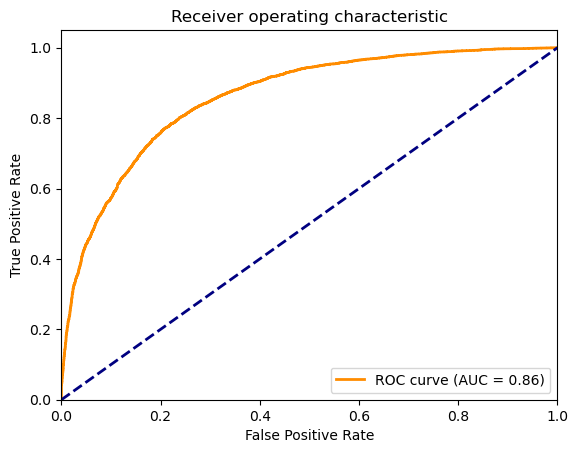

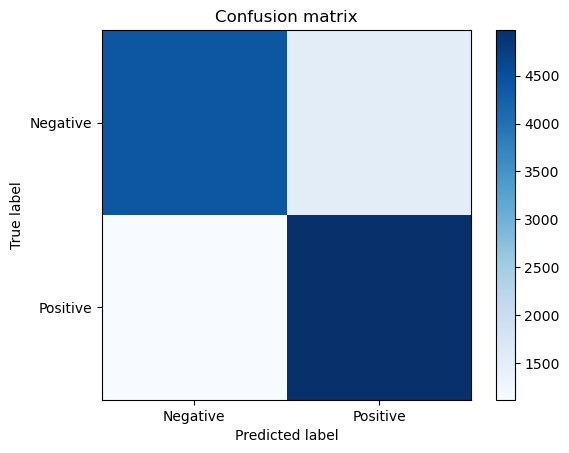

In [ ]:
import matplotlib.pyplot as plt

# Plot the ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pre[:,1])
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()
# Plot the confusion matrix
cm = confusion_matrix(y_true, np.argmax(y_pre, axis=1))
plt.figure()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion matrix')
plt.colorbar()
tick_marks = np.arange(num_classes)
plt.xticks(tick_marks, ['Negative', 'Positive'])
plt.yticks(tick_marks, ['Negative', 'Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.show()



# Challenge II : Train a Legal BERT model

Masked language models are powerfull tools, however they often perform poorly on domain specific tasks and novel languages, this is why it's often required to fine-tune a Masked language models on specific domain data, and this is what you will acomplish in this coding challenge.

**Use Legal texts from the [pile-of-law dataset](https://huggingface.co/datasets/pile-of-law/pile-of-law) to fine tune a model from the BERT familly for Legal specific domain, (Use the [fill-mask](https://huggingface.co/tasks/fill-mask) task in order to acheive this)**

Directions :
- You can choose to fine tune any version of BERT, DistilBERT or Roberta available on Hugging face's hub.
- The *pile-of-law dataset* is a corpus of more then 250GB that contains multiple legal datasets, you should select a specific dataset from the corpus to fine tune your model, (we recommand to start with the `constitutions` dataset that contain *The World's constitutions*, since it's a smaller dataset and should be quicker to train), you can see the full list of datsets [in the *dataset card* on hugging face](https://huggingface.co/datasets/pile-of-law/pile-of-law)
- To evaluate your model use the `perplexity` and the `Cross Entropy` and compare it's results to the base models (fine tunned on)
- We except a well wrtitten, comented and documented code, that respects as closely as possible python's conventions and best coding practisses.

In [ ]:
# imports and configurations
import torch
from transformers import AutoTokenizer, AutoModel, DistilBertTokenizer, DistilBertForMaskedLM, DataCollatorForLanguageModeling, Trainer, TrainingArguments
from datasets import load_dataset
import torch.nn as nn
import torch.optim as optim

## Retreive your Data

In [ ]:
from datasets import load_dataset

dataset = load_dataset("pile-of-law/pile-of-law", "constitutions")

Generating train split: 0 examples [00:00, ? examples/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Dataset pile_of_law downloaded and prepared to /root/.cache/huggingface/datasets/pile-of-law___pile_of_law/constitutions/0.0.0/c1090502f95031ebfad49ede680394da5532909fa46b7a0452be8cddecc9fa60. Subsequent calls will reuse this data.


  0%|          | 0/2 [00:00<?, ?it/s]

## EDA

Discover your data, Explore it and Visualize it

In [ ]:
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'created_timestamp', 'downloaded_timestamp', 'url'],
        num_rows: 139
    })
    validation: Dataset({
        features: ['text', 'created_timestamp', 'downloaded_timestamp', 'url'],
        num_rows: 48
    })
})


Print the first element of the train text data

In [ ]:

#print(dataset["train"][0]["text"])

In [ ]:
import pandas as pd
#print( dataset['train'][1]["text"] )

# Convert to pandas dataframe
df = pd.DataFrame(dataset['train'])

# Display the first 5 rows
df.head()

,text,created_timestamp,downloaded_timestamp,url
0,\n Albania 1998 (rev. 2016)\n \n \n\n \n ...,,10-18-2021,https://www.constituteproject.org/constitution...
1,\n Algeria 2020\n \n \n\n \n\n \n\n\nPrea...,,10-18-2021,https://www.constituteproject.org/constitution...
2,\n Andorra 1993\n \n \n\n \n\n \n\n\nPrea...,,10-18-2021,https://www.constituteproject.org/constitution...
3,\n Angola 2010\n \n \n\n \n\n \n\n\nPream...,,10-18-2021,https://www.constituteproject.org/constitution...
4,\n Antigua and Barbuda 1981\n \n \n\n \n\n...,,10-18-2021,https://www.constituteproject.org/constitution...


In [ ]:
missing_count = df['text'].isnull().sum()

print(f"Number of missing text values: {missing_count}")

Number of missing text values: 0


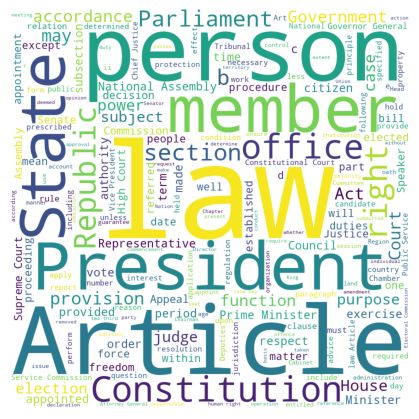

In [ ]:
#visualizes the frequency of words in the text data using wordcloud

#Concatenate text
text = ""
for row in df.itertuples():
    if not pd.isna(row.text):
        text += row.text + " "

# Generate word cloud
wordcloud = WordCloud(width=800, height=800, background_color='white').generate(text)

# Plot word cloud
plt.figure(figsize=(4, 4), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

## Data preprocessing

The **preprocess** function first extracts the text from the example, then uses the encode_plus() function from the tokenizer to encode the text. The function also specifies some additional parameters for the encoding, such as adding special tokens, setting a maximum length of 512, and padding or truncating the text as necessary. Finally, the function returns the input ids and attention mask that are required as inputs for the model.

In [ ]:
# Preprocess the data
def preprocess(example):
    # Get the text from the example
    text = str(example["text"])
    # Encode the text using the tokenizer
    inputs = tokenizer.encode_plus(text,
                                    return_tensors='pt',
                                    add_special_tokens=True,
                                    max_length=512,
                                    padding='max_length',
                                    truncation=True)
    # Extract the input ids and attention mask from the encoded text
    input_ids = inputs['input_ids']
    attention_mask = inputs['attention_mask']
    return input_ids, attention_mask


## Build and Train your model

The used models are :

**the Legal-BERT model**, which is a specialized BERT model that has been trained on a large corpus of legal documents

**DistilBERT uncased**, which is a smaller and faster variant of the BERT model that has been pre-trained on a large corpus of text from various domains.

1. The code uses the transformers library to load the Legal-BERT model and tokenizer.

2. The last layer of the pre-trained Legal-BERT model is unfrozen for fine-tuning.

3. A custom PyTorch module called FillMaskModel is defined, which takes in Legal-BERT's outputs and predicts the masked token.

4. The model is fine-tuned using a cross-entropy loss function and the Adam optimizer.

5. The training loop iterates over the training examples, preprocesses the data, calculates the loss and accuracy, and updates the model's weights.

6. The code saves the best model state based on accuracy and loss, and downloads the saved model every 60 epochs.

7. The code also checks if there is a saved model state and resumes training from the last epoch if it exists.

*Ps: the notebook was trained on kaggle which has a limeted session time, before each session end, the model was saved and launched again with the same code cell starting from the epoch the session ended at, and by replacing the variable saved_state_file with the new model path.*

# **1- Legal-BERT model**

In [ ]:
# Import required libraries
from transformers import AutoTokenizer, AutoModel
import torch.nn as nn
import torch.optim as optim
import torch
import os

# Load the pre-trained Legal BERT tokenizer and model
tokenizer = AutoTokenizer.from_pretrained("nlpaueb/legal-bert-base-uncased")
model = AutoModel.from_pretrained("nlpaueb/legal-bert-base-uncased")

# Freeze all layers except the last one
for param in model.parameters():
    param.requires_grad = False
model.encoder.layer[-1].output.requires_grad = True

# Define the fill-mask task
class FillMaskModel(nn.Module):
    def __init__(self, model):
        super(FillMaskModel, self).__init__()
        self.model = model
        self.linear = nn.Linear(768, tokenizer.vocab_size)

    def forward(self, input_ids, attention_mask):
        outputs = self.model(input_ids, attention_mask)
        hidden_state = outputs.last_hidden_state
        masked_output = hidden_state[:, 1:-1, :]
        linear_output = self.linear(masked_output)
        return linear_output

# Create a FillMaskModel instance with the pre-trained Legal BERT model
model = FillMaskModel(model)

# Define the optimizer and loss function
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=1e-5)
loss_fn = nn.CrossEntropyLoss()

# Check if there is a saved model state
max_acc = 0.9
min_loss = 0.02
saved_state_file = "/kaggle/input/models337/model_state_legal337.pt"

# Create a directory to save the trained models
model_dir = "./saved_models"
if not os.path.exists(model_dir):
    os.makedirs(model_dir)
    print("model dir created")

# Set the starting epoch
epoch = 0

if os.path.exists(saved_state_file):
    # Load the saved model state
    print("Loading saved model state...")
    state_dict = torch.load(saved_state_file)
    state_dict["epoch"]=337
    model.load_state_dict(state_dict["model_state"])
    optimizer.load_state_dict(state_dict["optimizer_state"])
    epoch = state_dict["epoch"]
    print(epoch)

# Define the number of epochs to train the model
num_epochs = 700

# Train the model for num_epochs
while epoch < num_epochs:
    epoch += 1
    epoch_loss = 0
    epoch_acc = 0
    num_examples = 0

    # Train the model for each example in the training dataset
    for example in dataset['train']:
        # Preprocess the example and get the input_ids and attention_mask
        input_ids, attention_mask = preprocess(example)
        # Get the logits of the FillMaskModel for the input_ids and attention_mask
        logits = model(input_ids, attention_mask)
        # Calculate the loss and accuracy for the example
        loss = loss_fn(logits.view(-1, tokenizer.vocab_size), input_ids.view(-1)[1:-1])
        acc = (torch.argmax(logits.view(-1, tokenizer.vocab_size), dim=1) == input_ids.view(-1)[1:-1]).sum().item() / input_ids.view(-1)[1:-1].shape[0]
        # Update the epoch loss and accuracy
        epoch_loss += loss.item() * input_ids.shape[0]
        epoch_acc += acc * input_ids.shape[0]
        num_examples += input_ids.shape[0]
        # Backpropagate the loss and update the parameters of the model
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

    epoch_loss /= num_examples
    epoch_acc /= num_examples


    print(f"Epoch {epoch}: Loss={epoch_loss:.4f}, Accuracy={epoch_acc:.4f}")

      # Check if the model has reached the desired accuracy and loss
    if epoch_acc > max_acc and epoch_loss < min_loss:
        break

    # Download the saved models every 60 epochs
    if (epoch+1) % 60 == 0 :

        state_dict = {
                "model_state": model.state_dict(),
                "optimizer_state": optimizer.state_dict(),
                "epoch": epoch,
            }
        torch.save(state_dict, os.path.join(model_dir, f"model_epoch{epoch+1}.pt"))


Some weights of the model checkpoint at nlpaueb/legal-bert-base-uncased were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Loading saved model state...
337
Epoch 338: Loss=0.0625, Accuracy=0.9985
Epoch 339: Loss=0.0617, Accuracy=0.9985
Epoch 340: Loss=0.0609, Accuracy=0.9985
Epoch 341: Loss=0.0601, Accuracy=0.9985
Epoch 342: Loss=0.0593, Accuracy=0.9986
Epoch 343: Loss=0.0586, Accuracy=0.9986
Epoch 344: Loss=0.0578, Accuracy=0.9986
Epoch 345: Loss=0.0571, Accuracy=0.9986
Epoch 346: Loss=0.0563, Accuracy=0.9986
Epoch 347: Loss=0.0556, Accuracy=0.9986
Epoch 348: Loss=0.0549, Accuracy=0.9986
Epoch 349: Loss=0.0542, Accuracy=0.9987
Epoch 350: Loss=0.0535, Accuracy=0.9987
Epoch 351: Loss=0.0528, Accuracy=0.9987
Epoch 352: Loss=0.0521, Accuracy=0.9987
Epoch 353: Loss=0.0514, Accuracy=0.9987
Epoch 354: Loss=0.0508, Accuracy=0.9988
Epoch 355: Loss=0.0501, Accuracy=0.9988
Epoch 356: Loss=0.0495, Accuracy=0.9988
Epoch 357: Loss=0.0488, Accuracy=0.9988
Epoch 358: Loss=0.0482, Accuracy=0.9988
Epoch 359: Loss=0.0476, Accuracy=0.9988
Epoch 360: Loss=0.0470, Accuracy=0.9988
Epoch 361: Loss=0.0463, Accuracy=0.9988
Epoch 3

In [ ]:
#Save and download the last model
import os

model_dir = "./saved_models"

if not os.path.exists(model_dir):
    os.makedirs(model_dir)
state_dict = {
        "model_state": model.state_dict(),
        "optimizer_state": optimizer.state_dict(),
        "epoch": epoch,
    }
torch.save(state_dict, os.path.join(model_dir, "model_state_legal427.pt"))

from IPython.display import FileLink
FileLink(os.path.join(model_dir, "model_state_legal427.pt"))

/kaggle/working/saved_models/model_state_legal427.pt

## Evaluate your result

Use Perplexity and Cross Entropy metrics to evaluate your model.

The function **evaluate** first sets the model to evaluation mode and creates a data loader for the validation set. It then loops over the validation examples and calculates the loss and total number of tokens for each example. The total loss and total number of tokens are used to calculate the average loss and cross-entropy. Finally, the perplexity is calculated by taking the exponential of the average loss.

In [ ]:
from math import exp  #  exponential function
from torch.utils.data import DataLoader

def evaluate(model, dataset):

    model.eval()  # Switch model to evaluation mode
    dataloader = DataLoader(dataset['validation'], batch_size=1, shuffle=False)

    # Initialize the total loss and number of tokens to 0
    total_loss = 0
    total_num_tokens = 0

    with torch.no_grad():  # Turn off gradient calculation
        for example in dataloader:
            input_ids, attention_mask = preprocess(example)  # Preprocess the input
            logits = model(input_ids, attention_mask)  # Get the model's output
            loss = loss_fn(logits.view(-1, tokenizer.vocab_size), input_ids.view(-1)[1:-1])
            total_loss += loss.item() * input_ids.shape[0]
            total_num_tokens += input_ids.shape[1] - 2

    # Calculate the average loss and perplexity
    avg_loss = total_loss / len(dataset['validation'])
    perplexity = exp(avg_loss)
    cross_entropy = avg_loss / total_num_tokens  # Calculate the cross-entropy

    return perplexity, cross_entropy


**Evaluate the fine tunned model and the base model, and comparing between them**

In [ ]:
#evaluate the model and compare it with legal bert model
legal_bert = AutoModel.from_pretrained("nlpaueb/legal-bert-base-uncased")
legal_bert_perp, legal_bert_cross=evaluate(legal_bert, dataset)

print(f"Perplexity of the base  model is: : {legal_bert_perp:.4f}")
print(f"Cross-Entropy of the base model is: : {legal_bert_cross:.4f}")

Some weights of the model checkpoint at nlpaueb/legal-bert-base-uncased were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.bias', 'cls.predictions.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Perplexity of the base  model is: : 32750.2772
Cross-Entropy of the base model is: : 0.0004


In [ ]:

medel_prep, model_cross =evaluate(model, dataset)

print(f"Perplexity of the model after fine tunning is: {medel_prep:.4f}")
print(f"Cross-Entropy of the model after fine tunning is: {model_cross:.4f}")

Perplexity of the model after fine tunning is: 42.7522
Cross-Entropy of the model after fine tunning is: 0.0002


# Comparison between the base model and the model after fine tunning
The high perplexity of the base model after applaying it on the pile of law/constitutions data indicates that the model is not able to predict the word with a high level of confidence. On the other hand, the low cross-entropy value suggests that the model is doing a good job at minimizing the average number of bits required to encode each word in the dataset.

After fine-tuning the same model on the dataset and evaluating it, we got a perplexity of 42.7522 and cross-entropy of 0.0002. These values indicate a significant improvement in the performance of the model, indicating that the model is able to predict the words more accurately after fine tuning. The model got a lower cross-entropy value which indicates that the fine-tuned model is doing a better job at minimizing the average number of bits required to encode each word in the dataset.

# **2- DistilBERT uncased**

The distilbert uncased model was pretrained at the same time and same way as the LegalBert model here, exept replacing the encoder method of the model with the transformer method, and replace the AutoTokenizer and AutoModel with DistilBertTokenizer and DistilBertModel respectively  https://drive.google.com/file/d/1O_lw9-wGpl7acOTaLRNabLB4XYW5lUAl/view?usp=share_link

# **3- Comparison between DistilBERT and LegalBert**

We have two models that were fine-tuned on a legal dataset (Pile of law/constitution ).
Both models have the same cross entropy, which means that they have similar performance in terms of loss calculation. However, The DistilBERT model has a higher perplexity of 63.3633, while the LegalBERT model has a lower perplexity of 42.7522.
Therefore, in this case, the LegalBERT model is better at performing the Fill mask task on the legal text of the constitutions data than the DistilBERT model, according to the evaluation metrics that have been chosed.

# Challenge III : Mini-Challenges

The third and final challenge consist of several mini-challenges that are considerably smaller then the previous two, theses challenges in general do not require to train a model.

Directions :
- We except a well wrtitten, comented and documented code, that respects as closely as possible python's conventions and best coding practisses.

## 1. NER

Use HuggingFace's pipeline to extract named entities from the following sentences

In [ ]:
sentences = [
    "Abraham Lincoln was a president who lived in the United States.",
    "EU rejects German call to boycott British lamb.",
    "the Constitution of the USA was signed in 1787, along with the 27 Amendments.",
]

In [ ]:
# your code here
from transformers import pipeline

# Initializing the NER pipeline
nlp = pipeline("ner")

# Looping over the list of sentences and extracting named entities using the NER pipeline
for sentence in sentences:
    entities = nlp(sentence)
    # Printing the named entities for each sentence
    print(entities)

No model was supplied, defaulted to dbmdz/bert-large-cased-finetuned-conll03-english and revision f2482bf (https://huggingface.co/dbmdz/bert-large-cased-finetuned-conll03-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


[{'entity': 'I-PER', 'score': 0.998367, 'index': 1, 'word': 'Abraham', 'start': 0, 'end': 7}, {'entity': 'I-PER', 'score': 0.99942005, 'index': 2, 'word': 'Lincoln', 'start': 8, 'end': 15}, {'entity': 'I-LOC', 'score': 0.9996445, 'index': 10, 'word': 'United', 'start': 49, 'end': 55}, {'entity': 'I-LOC', 'score': 0.99965715, 'index': 11, 'word': 'States', 'start': 56, 'end': 62}]
[{'entity': 'I-ORG', 'score': 0.9985098, 'index': 1, 'word': 'EU', 'start': 0, 'end': 2}, {'entity': 'I-MISC', 'score': 0.99920005, 'index': 3, 'word': 'German', 'start': 11, 'end': 17}, {'entity': 'I-MISC', 'score': 0.9993913, 'index': 7, 'word': 'British', 'start': 34, 'end': 41}]
[{'entity': 'I-MISC', 'score': 0.99855477, 'index': 2, 'word': 'Constitution', 'start': 4, 'end': 16}, {'entity': 'I-MISC', 'score': 0.9981856, 'index': 3, 'word': 'of', 'start': 17, 'end': 19}, {'entity': 'I-MISC', 'score': 0.9980046, 'index': 4, 'word': 'the', 'start': 20, 'end': 23}, {'entity': 'I-MISC', 'score': 0.96180606, 'in

## 2. Sentence similarity

Using Sentence Transformers, detect the sentences similar to the text bellow from the candidate sentences.




In [ ]:
text = "How many calories are in one single strawberry?"


candidate_sentences = [
    "Abraham Lincoln was a president who lived in the United States.",
    "How many calories is a handful of strawberries?",
    "German call to boycott British lamb was rejected by the EU.",
    "How many calories are in a typical burger?",
    "A member of my team will execute your orders with immense precision.",
    "How to reduce my calorie consumption.",
]

In [ ]:
# your code here

!pip install sentence-transformers

from sentence_transformers import SentenceTransformer, util

# Define the  model
model = SentenceTransformer('paraphrase-distilroberta-base-v1')


# Encode the text and the candidate sentences using the model
text_embeddings = model.encode(text, convert_to_tensor=True)
candidate_embeddings = model.encode(candidate_sentences, convert_to_tensor=True)

# Compute the cosine similarity between the text and candidate sentences
cosine_scores = util.pytorch_cos_sim(text_embeddings, candidate_embeddings)

# Detect the sentences similar to the text (with the highest similarity score)
highest_score = max(cosine_scores)
highest_score_index = cosine_scores.argmax()

# Print the most similar sentence
print("Most similar sentence to the text:\n", candidate_sentences[highest_score_index])


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.0/86.0 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 57.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 59.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 22.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 64.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 36.4 MB/s eta 0:00:00
  Created wheel for sentence-transformers: filename=sentence_transformers-2.2.2-py3-none-any.whl size=125926 sha256=0646df411832a6d6e18c0e8c2279e7e083087e8e538b90b562312cd244a7d66c
  Stored in directory: /root/.cache/pip/wheels/62/f2/10/1e606fd5f02395388f74e7462910fe851042f97238cbbd902f
Successfully built sentence-transformers


Most similar sentence to the text:
 How many calories is a handful of strawberries?
